In [15]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [16]:
start = time.time()
data_clean = pd.read_csv('data_emotion_clean.csv', encoding='latin1')
# exclude_labels = ['Happy']
# data_clean = data_clean[~data_clean['Emotion'].isin(exclude_labels)]
label = '2nd Emotion'
data_clean.head()

Customer Review Emotion 2nd Emotion
0  alhamdulillah fungsi packaging aman respon cep...   Happy    Positive
1           barang bagus respon cepat harga saing yg   Happy    Positive
2        barang bagus fungsi seler ramah kirim cepat   Happy    Positive
3  bagus sesuai harap jual nya ramah trimakasih l...   Happy    Positive
4                      barang bagus emas aman fungsi   Happy    Positive

In [17]:
kelas_emosi = []
emosi_cleans = data_clean[label].astype('U')
for ke, emosi in enumerate(emosi_cleans):
    if emosi not in kelas_emosi:
        kelas_emosi.append(emosi)
kelas_emosi = sorted(kelas_emosi)

print(kelas_emosi)

['Negative', 'Positive']


In [ ]:
MAX_NB_WORDS = 7000
MAX_WORDS = data_clean['Customer Review'].str.split().str.len().max()
tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(data_clean['Customer Review'].astype('U'))
word_index = tokenizer.word_index
print(word_index)

x = tokenizer.texts_to_sequences(data_clean['Customer Review'].astype('U'))
x = pad_sequences(x, maxlen = int(MAX_WORDS))
y = pd.get_dummies(data_clean[label]).values

# print('Found %s uniqe tokens.' % len(word_index))
# print(x)
# print(y)

{'barang': 1, 'kirim': 2, 'yg': 3, 'sesuai': 4, 'nya': 5, 'bagus': 6, 'beli': 7, 'cepat': 8, 'ga': 9, 'produk': 10, 'banget': 11, 'pesan': 12, 'kecewa': 13, 'seller': 14, 'terima': 15, 'gak': 16, 'jual': 17, 'harga': 18, 'kualitas': 19, 'pakai': 20, 'bahan': 21, 'aman': 22, 'warna': 23, 'respon': 24, 'kasih': 25, 'packing': 26, 'toko': 27, 'rapi': 28, 'fungsi': 29, 'ya': 30, 'rusak': 31, 'udah': 32, 'aja': 33, 'mantap': 34, 'proses': 35, 'tp': 36, 'deskripsi': 37, 'pas': 38, 'order': 39, 'tdk': 40, 'kali': 41, 'bgt': 42, 'murah': 43, 'packaging': 44, 'layan': 45, 'ukur': 46, 'pake': 47, 'sy': 48, 'moga': 49, 'nyaman': 50, 'ramah': 51, 'tipis': 52, 'gambar': 53, 'recommended': 54, 'jg': 55, 'belanja': 56, 'sih': 57, 'dgn': 58, 'original': 59, 'oke': 60, 'coba': 61, 'jelek': 62, 'ok': 63, 'salah': 64, 'puas': 65, 'enak': 66, 'sampe': 67, 'bubble': 68, 'paket': 69, 'foto': 70, 'komplain': 71, 'kalo': 72, 'langsung': 73, 'buku': 74, 'fast': 75, 'plastik': 76, 'jam': 77, 'buka': 78, 'mudah'

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.1,
     random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_test)

(4860, 137) (4860, 2)
(540, 137) (540, 2)
[[   0    0    0 ...    0    6    8]
 [   0    0    0 ...  464   91    5]
 [   0    0    0 ...  232  334 1148]
 ...
 [   0    0    0 ...   12    3 4079]
 [   0    0    0 ...   68  100  213]
 [   0    0    0 ...   58   37   99]]


In [20]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(LSTM(128))
model.add(Dense(int(y.shape[1]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 137, 100)          600000    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 717506 (2.74 MB)
Trainable params: 717506 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
epochs = 50
batch_size = 500
model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size)

Epoch 1/50


KeyboardInterrupt: 

17/17 [==============================] - 2s 51ms/step
Accuracy:  0.8870370370370371
Recall:  0.886443661971831
Precision:  0.8869386181157125






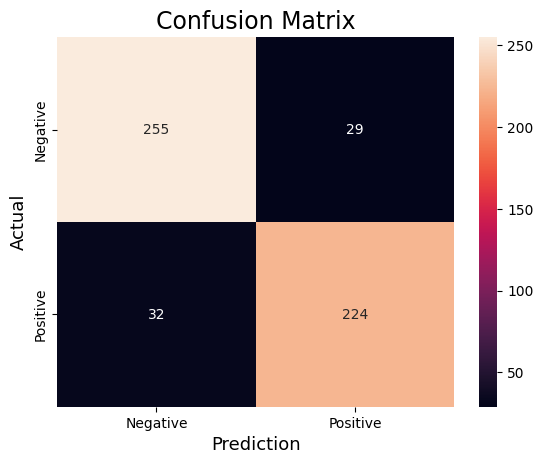



              precision    recall  f1-score   support

           0       0.89      0.90      0.89       284
           1       0.89      0.88      0.88       256

    accuracy                           0.89       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540

700.7635538578033


In [ ]:
def predicted_emotion_lstm(y_test,predicted):
    print("Accuracy: ", accuracy_score(y_test, predicted))
    print("Recall: ", recall_score(y_test,predicted, average="macro"))
    print("Precision: ", precision_score(y_test,predicted, average="macro"))
    # print("F1 Score: ", f1_score(y_test, predicted, average="macro"))
    print('\n')
    # print(f"Confusion Matrix:\n {confusion_matrix(y_test, predicted)}")
    print('\n')
    cm = confusion_matrix(y_test, predicted)
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=kelas_emosi,
            yticklabels=kelas_emosi)
    plt.xlabel('Prediction', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
    print('\n')
    print(classification_report(y_test, predicted, zero_division = 1))

predicted_lstm = model.predict(x_test)

y_pred=np.argmax(predicted_lstm, axis=1)
y_test=np.argmax(y_test, axis=1)

predicted_emotion_lstm(y_test,y_pred)

end = time.time()
print(end-start)